### 0. Import dataset

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


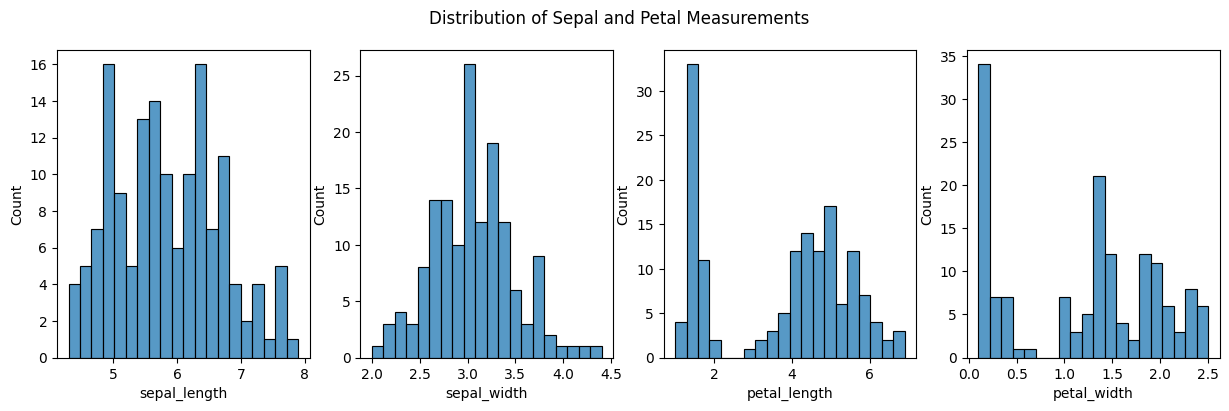

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

sns.histplot(data=iris, x='sepal_length', bins=20, ax=axs[0])
sns.histplot(data=iris, x='sepal_width', bins=20, ax=axs[1])
sns.histplot(data=iris, x='petal_length', bins=20, ax=axs[2])
sns.histplot(data=iris, x='petal_width', bins=20, ax=axs[3])

fig.suptitle('Distribution of Sepal and Petal Measurements')
plt.show()

### 1. [1 point] Prepare the data in one-against-the-rest strategy. <br>This can be done by converting the "Species" column into 3 binary columns. 

In [39]:
iris = pd.get_dummies(data=iris, columns=['species'], dtype=int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### 2. [2 points] Formulate the error function of the logistic regression with ridge regularization criterion.

![error_function](error_function.png)

### 3. [2 points] Derive the gradient of the error function by deriving the partial derivative of the error function in Task 2.

![gradient](gradient.png)

### 4. [2 point] Implement the gradient descent using all of the dataset in each iteration. (Use equation from Task 3)

In [40]:
def modify_matrix_X(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
    """
    modified_X = np.c_[np.ones((X.shape[0], 1)), X]
    return modified_X

In [41]:
def initialize_vector_w(k):
    """ Initial value of vector θ
    """
    #vector_w = np.random.randn(k + 1, 1) # vector random
    vector_w = np.zeros((k + 1, 1)) # vector 0
    return vector_w

In [42]:
def sigmoid_function(z):
    """ Calculate the sigmoid value of the inputs
    """
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [43]:
def error_function(modified_X, vector_y, vector_w, _lambda):
    """Calculate the Binary Cross Entropy error function of Logistic regression with ridge regularization
    """
    n = modified_X.shape[0]

    # calculate H(x)
    vector_y_pred = sigmoid_function(np.dot(modified_X, vector_w))
    
    # calculate ridge regularization
    L2_penalty = _lambda * np.square(vector_w).sum()
    
    # calculate error
    error =  (1.0/n) * np.sum(-1 * np.dot(vector_y.T, np.log(vector_y_pred)) - np.dot((1.0 - vector_y).T, np.log(1.0 - vector_y_pred))) + L2_penalty
    return error

In [44]:
def calculate_gradient(modified_X, vector_y, vector_w, _lambda):
    """ Calculate the gradient of Logistic regression with ridge regularization
    """
    # process parameter
    n = modified_X.shape[0]
    
    # calculate H(x)
    vector_y_pred = sigmoid_function(np.dot(modified_X, vector_w))
    
    # calculate ridge regularization
    L2_penalty = 2.0 * _lambda * vector_w

    gradient = (1.0/n) * np.dot(modified_X.T, (vector_y_pred - vector_y)) + L2_penalty
    return gradient

In [45]:
def logistic_regression(X, y, learning_rate, iterations, _lambda):
    """ Find the Logistics regression model using batch gradient descent for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final w vector and error value of each iterations
    """
    modified_X = modify_matrix_X(X)
    vector_y = np.reshape(y, (len(y), 1))
    vector_w = initialize_vector_w(X.shape[1])
    error_list = []
    
    for i in range(iterations):
        gradient = calculate_gradient(modified_X, vector_y, vector_w, _lambda)
        vector_w = vector_w -  learning_rate * gradient

        #Calculate the error for each training instance
        error = error_function(modified_X, vector_y, vector_w, _lambda)
        error_list.append(error)
    
    return vector_w, error_list

### Prepare dataset

In [46]:
target = ['species_Iris-setosa','species_Iris-versicolor','species_Iris-virginica']
X = iris.drop(columns=target)
y = iris[target]

In [47]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
def standardize(X):
    return (X - X.mean())/X.std()

In [49]:
X = X.apply(standardize)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [50]:
y.head()

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
learning_rate = 0.01
iterations = 1000
_lambda = 0.1
w_list = []
error_list = []
for species in target:
    w, error = logistic_regression(X, y[species], learning_rate, iterations, _lambda)
    w_list.append(w)
    error_list.append(error)

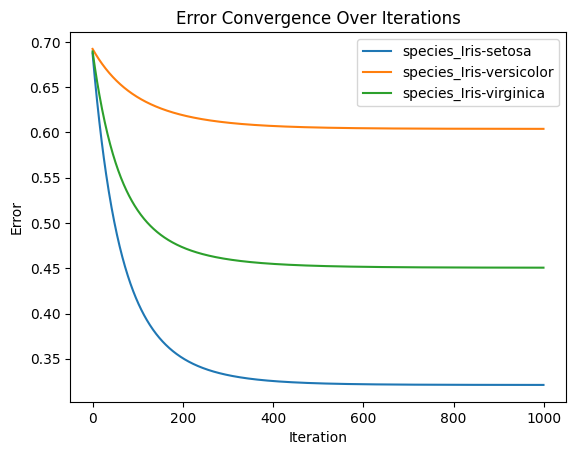

In [52]:
for i, error_values in enumerate(error_list):
    plt.plot(error_values, label=f'{target[i]}')

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Convergence Over Iterations')
plt.legend()
plt.show()

In [53]:
w_list_reshape = [arr.reshape(1, -1)[0] for arr in w_list]
columns = ['w0', 'w1', 'w2', 'w3', 'w4']
w_df = pd.DataFrame(w_list_reshape, columns=columns, index=target)
w_df

,w0,w1,w2,w3,w4
species_Iris-setosa,-0.404002,-0.387452,0.470275,-0.590634,-0.557455
species_Iris-versicolor,-0.382599,0.011366,-0.484133,0.120389,-0.016481
species_Iris-virginica,-0.435765,0.342710,0.038663,0.448002,0.552746


---

### 5. [1 point] Implement the stochastic gradient descent using the subset of dataset in each iteration. (Use equation from Task 3)

In [54]:
def logistic_regression_sgd(X,y,learningrate, iterations, _lambda, sample_size):
    """ Find the Logistics regression model using stochastic gradient descent for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
          sample_size: proportion of sample
        Return value: the final w vector and error value of each iterations
    """
    modified_X = modify_matrix_X(X)
    vector_y = np.reshape(y, (len(y), 1))
    vector_w = initialize_vector_w(X.shape[1])
    error_list = []
    num_sample = int(sample_size * len(X)) # number of samples
    
    for i in range(iterations):
        # Update w using random samples data
        idx = np.random.choice(np.arange(len(modified_X)), num_sample, replace=False)
        X_sample = modified_X[idx]
        y_sample = vector_y[idx]
        
        gradient = calculate_gradient(X_sample, y_sample, vector_w, _lambda)
        vector_w = vector_w - learningrate * gradient
        
        # Calculate the error for each training instance
        error = error_function(X_sample, y_sample, vector_w, _lambda)
        error_list.append(error)
        
    return vector_w, error_list

In [55]:
learning_rate = 0.01
iterations = 1000
_lambda = 0.1
sample_size = 0.5
w_list = []
error_list = []
for species in target:
    w, error = logistic_regression_sgd(X, y[species], learning_rate, iterations, _lambda, sample_size)
    w_list.append(w)
    error_list.append(error)

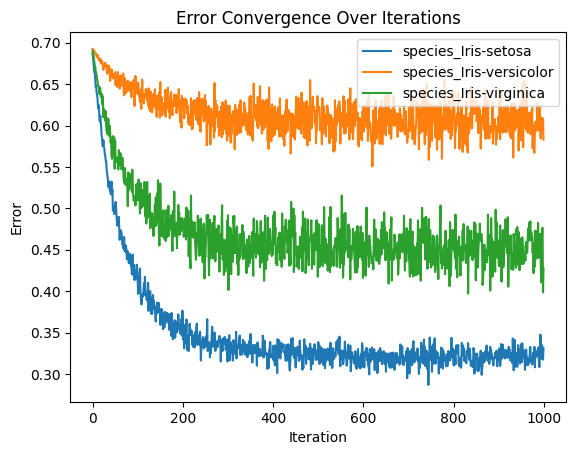

In [56]:
for i, error_values in enumerate(error_list):
    plt.plot(error_values, label=f'{target[i]}')

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Convergence Over Iterations')
plt.legend()
plt.show()

In [57]:
w_list_reshape = [arr.reshape(1, -1)[0] for arr in w_list]
columns = ['w0', 'w1', 'w2', 'w3', 'w4']
w_df = pd.DataFrame(w_list_reshape, columns=columns, index=target)
w_df

,w0,w1,w2,w3,w4
species_Iris-setosa,-0.404926,-0.386893,0.469837,-0.590082,-0.557168
species_Iris-versicolor,-0.382360,0.012662,-0.481664,0.120166,-0.017745
species_Iris-virginica,-0.439097,0.342176,0.041923,0.446756,0.551692


---

### 6. [1 point] Test to see the effect of λ on the training process.

In [58]:
learning_rate = 0.01
iterations = 3000
_lambda_list = [10, 1, 0.1, 0.01, 0.001, 0.0001]
w_list = []
error_list = []
for _lambda in _lambda_list:
    w, error = logistic_regression(X, y['species_Iris-setosa'], learning_rate, iterations, _lambda)
    w_list.append(w)
    error_list.append(error)

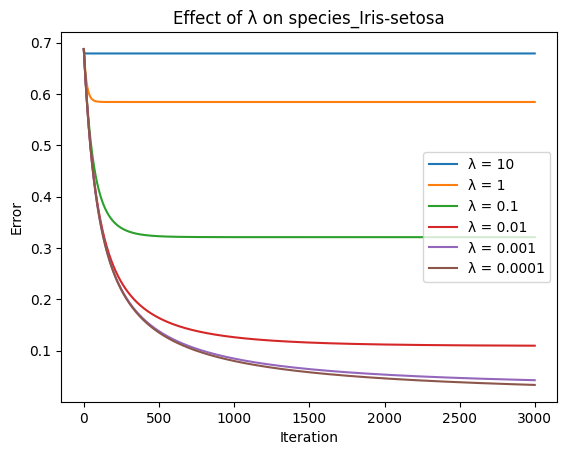

In [59]:
for i, error_values in enumerate(error_list):
    plt.plot(error_values, label=f'λ = {_lambda_list[i]}')

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Effect of λ on species_Iris-setosa')
plt.legend()
plt.show()

In [60]:
w_list_reshape = [arr.reshape(1, -1)[0] for arr in w_list]
columns = ['w0', 'w1', 'w2', 'w3', 'w4']
w_df = pd.DataFrame(w_list_reshape, columns=columns)
w_df['sum_of_square_w'] = np.sum(w_df**2, axis=1)
w_df.insert(0,'λ',_lambda_list)
w_df

,λ,w0,w1,w2,w3,w4,sum_of_square_w
0,10.0000,-0.008230,-0.016203,0.013602,-0.020929,-0.020124,0.001358
1,1.0000,-0.074178,-0.120405,0.110135,-0.161032,-0.154410,0.081904
2,0.1000,-0.415142,-0.384591,0.476367,-0.595413,-0.560344,1.215679
3,0.0100,-1.052334,-0.685352,1.050832,-1.196217,-1.108916,5.341991
4,0.0010,-1.298961,-0.829674,1.290453,-1.452287,-1.348377,7.968189
5,0.0001,-1.330096,-0.849501,1.321823,-1.486354,-1.380368,8.352689


จะเห็นว่ายิ่งค่า λ ต่ำจะทำให้การลู่เข้าช้ามากขึ้น<br>
และก็จะทำให้มีการใช้ค่า w ที่สูงขึ้น ซึ่งอาจจะนำไปสู่การ over fit ได้

---

### 7. [1 point] Test to see the effect of sampling proportion in Task 5.

In [61]:
learning_rate = 0.01
iterations = 1000
_lambda = 0.1
sample_size_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
w_list = []
error_list = []
for sample_size in sample_size_list:
    w, error = logistic_regression_sgd(X, y['species_Iris-setosa'], learning_rate, iterations, _lambda, sample_size)
    w_list.append(w)
    error_list.append(error)

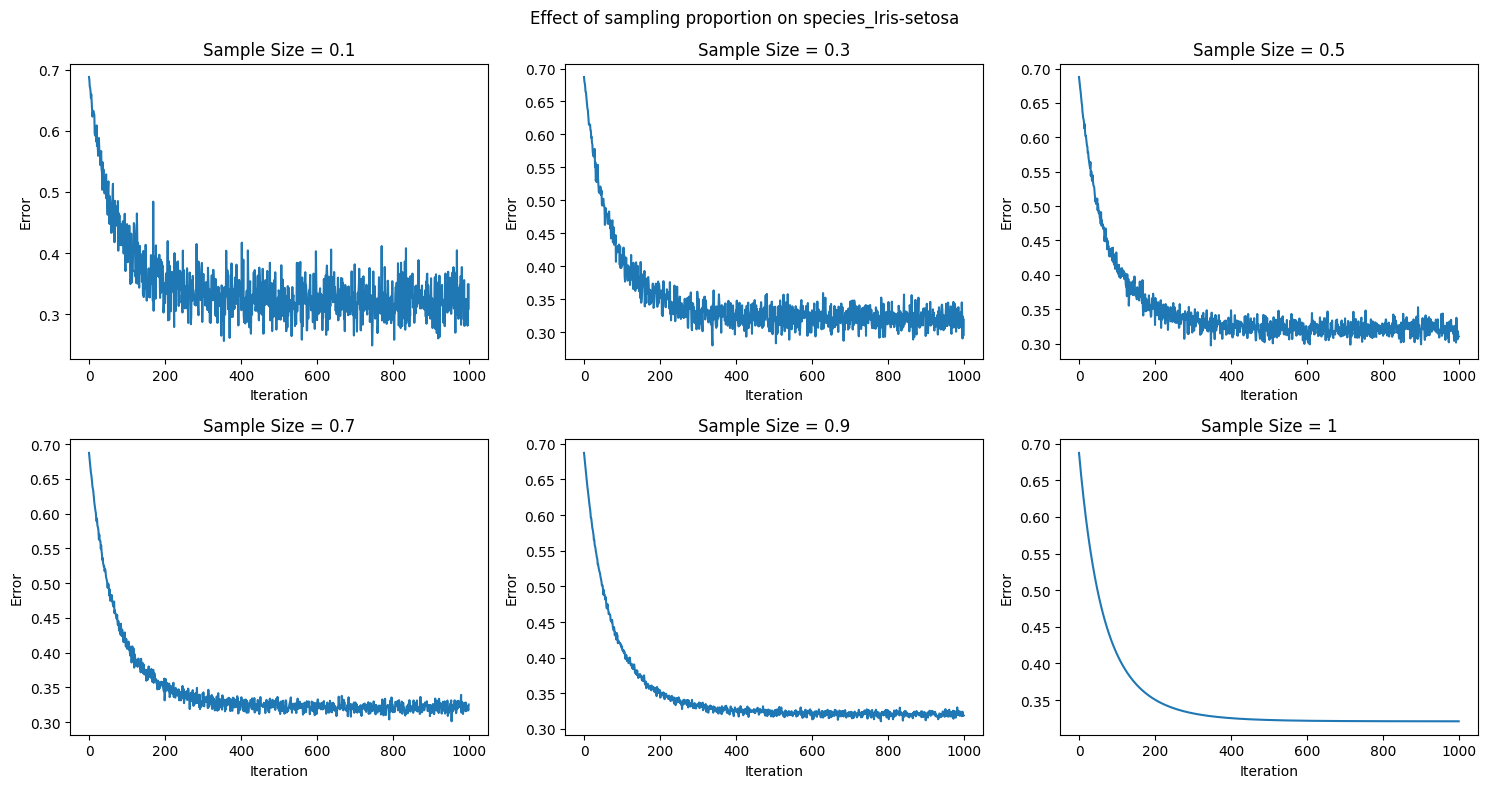

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Effect of sampling proportion on species_Iris-setosa')
axes = axes.flatten()
for i, (w, error, sample_size) in enumerate(zip(w_list, error_list, sample_size_list)):
    axes[i].plot(error)
    axes[i].set_title(f'Sample Size = {sample_size}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Error')
plt.tight_layout()

plt.show()

In [63]:
w_list_reshape = [arr.reshape(1, -1)[0] for arr in w_list]
columns = ['w0', 'w1', 'w2', 'w3', 'w4']
df = pd.DataFrame(w_list_reshape, columns=columns)
df.insert(0,'sample_size',sample_size_list)
df

,sample_size,w0,w1,w2,w3,w4
0,0.1,-0.409394,-0.388940,0.470077,-0.589347,-0.556648
1,0.3,-0.402837,-0.386453,0.473112,-0.590302,-0.557905
2,0.5,-0.405433,-0.388692,0.467240,-0.590673,-0.557753
3,0.7,-0.404971,-0.386515,0.471602,-0.590064,-0.556877
4,0.9,-0.403300,-0.387813,0.469818,-0.590719,-0.557989
5,1.0,-0.404002,-0.387452,0.470275,-0.590634,-0.557455


จะเห็นว่ายิ่งจำนวน sample น้อยจะทำให้ความผันผวนของการลู่เข้าสูงขึ้น<br>
แต่ผลลัพธ์ของ weight ที่ได้ก็ไม่ได้มีความแตกต่างกันมาก